UFS Validation with GFS and UDell Climatology

In [111]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import requests
import os.path
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.cm as cmap
import datetime
import io
import base64
from matplotlib import image
from matplotlib import ticker
import time as timelib
from scipy.interpolate import griddata

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rps_logo=b'iVBORw0KGgoAAAANSUhEUgAAAZQAAAB9CAMAAACyJ2VsAAAAnFBMVEX///9xA0r///1WWWByAUxaXmVQVFtiADf89vtrAEdwAEb39/hkADvz6vFuE05gY2pYAC6EOWZlAD/38Pbt4emWmJvw8PHn5+iChIfV1ddmaG61triMj5FjADTv3OnIyct3I1htcHW/wMPJqcCfcI+kpqlGSU+2jaZsAD2ESGyZZIR7Ll6rhJ/axtatf5zjz9/Rt8m+mrKVWH+PTnnLF5AAAAAQk0lEQVR4nO2dC5uaPBOGY2LiCm7ZugXBQ63ust2eD+///2/fTBIOooQIsdCvPNfVriLEJDeTyWGIhFiIUgr/bM4sLtH/bBInVH7DbdQyYVrJ/vXJFDVQTcuFstRvVHH2+E6vsa0nan/q+XeU35UP0NrKoOW/NDs5O+asClVCd1fLNnlyffLXVHPr7Heov8uXnuQ5ivz26YPuf37978NkfqW8Z0ssmPyX65J/8/ubfZ21y/78czX7cXyIsteb+HDMXm8P++xlGh/87AV87h/iVP6PF2J+5Xt4sQoDIVhxnbWoQnv39Ha3ePW8yZWaThe/G74AswnJzxbLq5P3dp8bGz358SOm/3p17kGQfXryFWvO0izlgLONPrwS/JAZwZYxH69JhcBTfcFC+J9xHqsz5HtK9oJzgMJFei0U+eWPX9uVCDV9uDNUnGpUvi6X83apv35uRALZ/w7Apy3zv3g8zf46CLh+uWdBDiXlgUj0iWHA0FJCxQSgcAklCIQyCvkeMAYsTKJ9ELxcayuI9teiZZVJ7R5NdzOk/2vx2jrx6e5nc/Zn7dOX2acVKEy3WTEvoPCA861+raBIJvQEChynOZSYi41iFkbkOlHy7suiQ5lUqQzJ37+dwUlt7dCbv7XIflsrAU1nlewDlOAgX8GtnkM5sgAchF+CAkz0ZzmUg+Ym38PVsf78WiKUfJt1MRNQtVTl1CH59g2LqrTloyH7hPxczDulj83XGRRoqIhssRQUKMaBhZHInE3IGUlZbkQZFJ6GXDZg8v2GsT25vpsuz3966FSkiYJS25t/mk3bGklWafeGEpCnXWsjLGX/FEp84PIe5zxUjp6SRAAnaM3UqWEQhNBYZVfkUELCeOBrKADo2larKNS0a63VWwoyad9yaZmgYPY7Jn8OhW33TKzQzfNVZg4hO+ABpjw2QOEskI6jAmUvX8r/wKWoT6+mAjdaZxmaL7STrpVmgoLZ79j4XrIUIis8Zim0WNpXy79MWRBCEUeo9OQMCpFHy1CSFyHEi2UbJueiXDC5DEX2/bs3jZNaKLLpnXVzJ1LnlhKDPxD+SojVSkPZMNkHTjlakHT0RxKJrAErQ4H/1wrKNoDmiyIUnvexm5lI4+9eqDqfAsgfpl1v40m9pbjwV1n2q1B8aLZS+KuaLwoDysMRlHLVZKku8VGOEStQ4Ch4InyVcmzsqL+KQmYLxZWd1FmKZDLp1vOSqm2+3NxS51CwjUrZeg3tkLaURAQwNBcM3LgaNao/WQN2AgWOctn6JdgllpOUqS0Ud4W6bCnSx88d3Mi1UJy0XZMaKBH48TXJoGx5sJWKuRxXaigRQDqHApeqPsA6G+SAgVngcOdPLpVK+5OZ/LA7lgtQlD/pMmQs6SIUojrDCkokeDZ7xeS4Ej70sRL32IBRegKFQgOmoCQ4zQI+KAptoDj0J5dKRXRX24E/QV2yFEi/2yxESafZpxoK4PAzKClT/h0+DGWLJaGgYhwsnkKRR9WrDU5IMob/W0BRdnI7KJKJAyORuth8ob9ypGr2uZD93ljOKb7gVAqDI/oU6EvBp1uhJlwodAjglf8ittiICQ0lkq/giiQGJkyIg900MTbIjirt3Ke48yeoS1AwfUfJ1w+zTnTxlObromSfrJqHj5S49CdnpcrGJ3gju8FSgZL7k5sZenlxl1ZXsSkl1VgDWvoor+HrpPyJowLlpTrJo9vkq5bi0p+g7CzlpqJ6vutmpaIOuxBSZ83X08Jp+gOAQqSddJ6Qqi2VW3+CqkLRfW1nGgAU143LWalkt87lrVyBIpm4mF7J1DMU5YRdM8lL5b4LIZVDcbT8U1UVCoXR3lqIQK/hUpJsuRDrNJKnJfE21ceha7yN4aSNHOyHqZozTrfbIi0/3mbCoShee5IIcT4+KZdK91hc+xNUAcXZHOeJzixlLziMLpicEaa4FM8ZTnupoIhE6Jli/TrCtRZ5PhMBfhAzVqSHES5MfQhDf7JlarLswPI0UN8c+5NyqahE7tSfoMrN1zfndnIOJRGBCJMkFXryEep1kyShUGvESWlxa8sDJqEEm80mPcDA3acwnD+BEhxCpY16uya43s/Ko8l7x05SqgicuIGdlKHQd0tI/xaGXtQQTrMom9i/BIlEtJaDP6CBkBIMJFKjQR/jKhCKmpbU02UVKHxbTlvi0Gjyg29d38YoCUWP6W6gkqXcIPvedPd4Yih7OYWFh2ScUbG+qCIlEIqe/N2wAgpVdhAqKEWNn0CRyTE/zJNUd/LiFlAe7jIf37K9NzeoBRT3nQjU7PEkQhLu91J77wu9Aizv+lg1X3rFcR3wEhSKq8VVKH4VygrSwzik4gvvrINxpraCM191ZOnP3cRyTUtedpKKSRoKpXdL59mfyuyfWMohKDU/wCAPJCJxIPAAhrhg+5bgEmO5+VLnmqHgglegYl61Pi7tDMWbPdhrpyKk6ePOdrLLW5ymsDQbWAaFfHy1s8TlNdl/eCanU1UYiVe8zwNYcNqeQV8Laj6JMaoYulLbYwlKdOSBiGgVilyyFOIlyVIB6OUg1jvLxmX2/b3t8w36ixRxu9TPkr/7+Wq0gKz5urNre6ezr++vyX115BgE+Ty98sxlKCuEsk+wZ+sLkWyYhoL1Dp3mIzmHEsgecQaFRDzgRdeLkp8WfnjuzSfXlSlL/ZNdlU0WP84uNWdMQYGzLKYhvel83ib7Ja2D4LT5OmavY+x2IRS5DrZha5JDgYGMYLGs+GrzFSd7VBaXhyv4eaA4/PndXG1gS/N31888y46dJZP3F5YpjUaWQfndbOhTmf1ukyZxUA5sjEQ+KgEbWhMFBewnOgCtHMpqtSpq3eRT9oKlAT/kJbdpvbzJ/L4NE1soyOSCmpsvyL7NfP0cb6luAk+8KVXBIdArv+jiUw2FBFyG2uVQSteboXC+RqSbrNZ+WJWqHROQFRRkUo18gbfma5RP+WbT+Eoz72YpkcB+LiZywKo7ymqFt/46wLkRBQWGKEjoMpRSlER18JjKeZaD/AZ56KnJE8+VnbRUM5TpZTuhNpZCyC9zd0D5k/bZL3ITQqcV6j2K+Qu6kwNnW6j55KAe8JJQKDhwJFRAKW4EgJJo+cqn5O/kKAVnOLPBDyXPZpeC3c0uhbKwlOX7S7exFZTG7KPm907m4GMW4PwjV3EQfoCv8YC85xUUguGTdVBUfwt6XCvZJS7egYmISMfE7FXR/2sYRniqUG3L1QxFtl3nF1pCaezdzT11YnelOCusH52DdiuUISn8qGbdX+SzcpHs46YvLwjlRZShiEwI5aX8Dk5XvWHoTsv5M0o+NFXavFOhGqEs3unHiCqyhPKlKfedbqlyfjA26HgsTU/5yXGfZKEUke/j18ipGB9fEz8qj9D9XJE6O3tH4Y1+ehhO0k9yvzGUCPuSk24NchOURV2/yNKnfGiwlO79rj5kgoIF7ugkjVA86U8uX+gACn70ru+F9lYyQ9nhQLtLucyWMvtRm7oLS5nOuma/J5mgTObPXctktpTPl/0JygWUeXVasYMuZ/KSKyzmyGjbLzdCef3WLtFCRihLw8PwLqAsOmffKFON53GUrWSEMuvsJo1QLs+uKFmO6A1Q5t7OlZeH6k3DMF9WpzpMJwyzeGDod4Vrxg74jIMP55DshLAuSaP6hDK7KZTJZNd9KK8zQ0k29pOx9soE9riPgbaGI45h8NOj3JvlqA+KTV2SRg0VCmmYa/yjUAg+NLSOldIMRIwTxOp1JIL1frU6rhmMG30YvcujOM/YSkNtvgh5Mm6tYgNl5hRKXDmC24FksQ5HppbwfQzDy4KFNkxcv32U1FCh0DvTlUOAEvJ4nc32bhBK4dcPGOvlc35o2f0aKhTyyRwQ0TsUn7Fjmu3psS9meFEJPvUoJ+T/v6B8WppnSnuGItfp/RVulkPVx5ylUf4hxoXxasiKvQYIBUv5qWmvrj8OJUDx3ItAEyXDufRKVnTA2OI4+xD8Dce1lVsMHnuzlOZ4ix6gnASgyA2MSrFGZB/j6kqsp4ZDGVzcdvQ4QCgU267hQZFbfhyPOlByq+IcglKrFm147ttxHav9hqoDhEI+WQRz9OxTIsZDXM3dBuXHF/wixngdHEhrDQyK9CcWsWJTm6l7p4NHFheTWbjwq4IcebmVomQlg15Qwd8K5dKI3vIZgByKyaiMG7VdqYqlgNNfS+lHIFaRXILMdgL7iy3lDAreipYxlRbLwdNd/T6TVwugrIoAlCR38CpcayPWstna/v3N1wVLuQd/YmcpWOH40HH92YuGzYuv0roIQEl0GJdcnfc5RkimgovDFo6yLOT4r4XiPT+e7jD//pfdY3gw1ldb4FLy683kzUVNJs93hi6pXIBq2Kq/fDkXLAtAScgqC0Ah+PAjBrLs10ISC7OrmGg5GYnqEYoHrnhZ1sJ6e2dvptfHjCMB8yoUJc+vyxotPmfPoWVaFfJJtCp2VvF1wHByTDf7qHx+i+rS6tNSKs/x2O/a4i2fZerlxdczUWNsEXzyFfd8vfjIkDd5re51X0n4JKH6r2ipXqG0fWZ49lwqtvw1E1o6kB0jDfXyZl73/OoUfdbptcW7yipveZccVz+Q0q+ltBBwXDzn6VN68RdmaM1xy6LDdzyUe260SLLGTNyGzPx1UCQTB7ckbSh6n9uA/HVQpmgnI5Qucg8F/ImT2hqhuNPCEZMRijs5YzJCcSVX/gQ1QnEkV/4ENUJxI3dtFxmhuJDn1k5GKG7k0J+gRijd5bkZxxcaoXSXU3+CosS4pdYIpUFeMS/sUPfGqP4RSqNct11yzdK4ojZCsWHiorCFKLk3L+aMUBrkti+s9PjFHPE3QjHoJv6EAhPPvPrsMjzpag0dymQ66/zceEWQ2GPTThXyp8970+ChOB4zSiETr2F/6bvWT8F319Ch3MSfSDsx+5Qv9dEst9fAoSxc+xOq/EmDvPnnHv38wKHMXI9P0J98sQj5855cfuu1GjIUl2taWhb9Lslk13HL3G4aMhTn/S5CVNvlNT2V5L1x/LXXqdcAb8P285Op9/C1yUyMYasXdd/YF1Y5+9qhzN3Va4D366Iuwnq5fPP5h0WFU3J3b68f33eWm7D3u6Fer5bScD/aMHneLaw1my3tfq3Nc/lkSwv1CGU6e298WKHZxVPy8bpf3LT8JcuH2l0U/4wG9iBqVU1188XZbx2X9Pq9500OBw6lSXZ++1r1OcWCGqGcqfNupp01QjmVN5k99UuEjFDOM/UR0+0XywilUuSPnfPUXSOUQlMPmfTs5FEjlEJzbLt6J0JGKGVNse1qfoD19hqhKGE6g/AnqBGK0mD8CWqEouQNxZ+gRihZWT9azYH+EY1Q1A9OD8afoEYouT8ZiJmQEYrOyXD8CWqEMhmWP0H981AyfzJCGRAUT9lJ55y41D8PRY0Zh6V/Hsrw7GSEMjh/gvrHoSwMv2rYn/5pKMsPPQd41eivhkI7QfH01MrQsFBieoBm+tB5B/9PhmA5B8kbs28oGG5tvPh+j1P1A3MnRG4Wv6t/LOC16+NMlPzc1VfN0kHE7tPD9Ui81+Vi+empzydNm/T04fJe8aDvd11vI9qQfNfMG9Ov05fPH785/BGPG+jGxmvei747lC4pDK7d0pL7wddl7rZ11rztuUX6La9RO3J3++6b6X/PkWWaG0eBDQAAAABJRU5ErkJggg=='
ioos_logo=b'iVBORw0KGgoAAAANSUhEUgAAAUAAAAB9CAMAAADk3UpfAAACiFBMVEX//////8z//5n//2b//zP//wD/zP//zMz/zJn/zGb/zDP/zAD/mf//mcz/mZn/mWb/mTP/mQD/Zv//Zsz/Zpn/Zmb/ZjP/ZgD/M///M8z/M5n/M2b/MzP/MwD/AP//AMz/AJn/AGb/ADP/AADM///M/8zM/5nM/2bM/zPM/wDMzP/MzMzMzJnMzGbMzDPMzADMmf/MmczMmZnMmWbMmTPMmQDMZv/MZszMZpnMZmbMZjPMZgDMM//MM8zMM5nMM2bMMzPMMwDMAP/MAMzMAJnMAGbMADPMAACZ//+Z/8yZ/5mZ/2aZ/zOZ/wCZzP+ZzMyZzJmZzGaZzDOZzACZmf+ZmcyZmZmZmWaZmTOZmQCZZv+ZZsyZZpmZZmaZZjOZZgCZM/+ZM8yZM5mZM2aZMzOZMwCZAP+ZAMyZAJmZAGaZADOZAABm//9m/8xm/5lm/2Zm/zNm/wBmzP9mzMxmzJlmzGZmzDNmzABmmf9mmcxmmZlmmWZmmTNmmQBmZv9mZsxmZplmZmZmZjNmZgBmM/9mM8xmM5lmM2ZmMzNmMwBmAP9mAMxmAJlmAGZmADNmAAAz//8z/8wz/5kz/2Yz/zMz/wAzzP8zzMwzzJkzzGYzzDMzzAAzmf8zmcwzmZkzmWYzmTMzmQAzZv8zZswzZpkzZmYzZjMzZgAzM/8zM8wzM5kzM2YzMzMzMwAzAP8zAMwzAJkzAGYzADMzAAAA//8A/8wA/5kA/2YA/zMA/wAAzP8AzMwAzJkAzGYAzDMAzAAAmf8AmcwAmZkAmWYAmTMAmQAAZv8AZswAZpkAZmYAZjMAZgAAM/8AM8wAM5kAM2YAMzMAMwAAAP8AAMwAAJkAAGYAADMAAAALihLaAAAACXBIWXMAAAsTAAALEwEAmpwYAAAMK2lUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNi4wLWMwMDIgNzkuMTY0NDYwLCAyMDIwLzA1LzEyLTE2OjA0OjE3ICAgICAgICAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bWxuczpzdEV2dD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3NUeXBlL1Jlc291cmNlRXZlbnQjIiB4bWxuczppbGx1c3RyYXRvcj0iaHR0cDovL25zLmFkb2JlLmNvbS9pbGx1c3RyYXRvci8xLjAvIiB4bWxuczpwZGY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8iIHhtbG5zOnBob3Rvc2hvcD0iaHR0cDovL25zLmFkb2JlLmNvbS9waG90b3Nob3AvMS4wLyIgeG1sbnM6dGlmZj0iaHR0cDovL25zLmFkb2JlLmNvbS90aWZmLzEuMC8iIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIiBkYzpmb3JtYXQ9ImltYWdlL3BuZyIgeG1wOk1ldGFkYXRhRGF0ZT0iMjAyMC0wOS0wMVQxODoxODowNy0wNDowMCIgeG1wOk1vZGlmeURhdGU9IjIwMjAtMDktMDFUMTg6MTg6MDctMDQ6MDAiIHhtcDpDcmVhdGVEYXRlPSIyMDE1LTA1LTI5VDA5OjQ1OjEyLTA0OjAwIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIElsbHVzdHJhdG9yIENTNiAoTWFjaW50b3NoKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo4YzgzYmVhMi1jOGNiLTQ2MDItOTU4Ny1hMWQ1ZTczMzY0ZmYiIHhtcE1NOkRvY3VtZW50SUQ9InhtcC5kaWQ6RUZBQ0FDMTQwMTM2NjgxMTgyMkFCNzkwQjczNjY4QTEiIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0idXVpZDo1RDIwODkyNDkzQkZEQjExOTE0QTg1OTBEMzE1MDhDOCIgeG1wTU06UmVuZGl0aW9uQ2xhc3M9InByb29mOnBkZiIgaWxsdXN0cmF0b3I6U3RhcnR1cFByb2ZpbGU9IlByaW50IiBwZGY6UHJvZHVjZXI9IkFkb2JlIFBERiBsaWJyYXJ5IDEwLjAxIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIyIiBwaG90b3Nob3A6SUNDUHJvZmlsZT0ic1JHQiBJRUM2MTk2Ni0yLjEiIHRpZmY6SW1hZ2VXaWR0aD0iNzAxIiB0aWZmOkltYWdlTGVuZ3RoPSIyNzQiIHRpZmY6UGhvdG9tZXRyaWNJbnRlcnByZXRhdGlvbj0iMiIgdGlmZjpTYW1wbGVzUGVyUGl4ZWw9IjMiIHRpZmY6WFJlc29sdXRpb249IjE0NC8xIiB0aWZmOllSZXNvbHV0aW9uPSIxNDQvMSIgdGlmZjpSZXNvbHV0aW9uVW5pdD0iMiIgZXhpZjpFeGlmVmVyc2lvbj0iMDIzMSIgZXhpZjpDb2xvclNwYWNlPSIxIiBleGlmOlBpeGVsWERpbWVuc2lvbj0iNzAxIiBleGlmOlBpeGVsWURpbWVuc2lvbj0iMjc0Ij4gPGRjOnRpdGxlPiA8cmRmOkFsdD4gPHJkZjpsaSB4bWw6bGFuZz0ieC1kZWZhdWx0Ij5JT09TX0VtYmxlbV9QcmltYXJ5X0FfUE1TPC9yZGY6bGk+IDwvcmRmOkFsdD4gPC9kYzp0aXRsZT4gPHhtcE1NOkRlcml2ZWRGcm9tIHN0UmVmOmluc3RhbmNlSUQ9InhtcC5paWQ6RUZBQ0FDMTQwMTM2NjgxMTgyMkFCNzkwQjczNjY4QTEiIHN0UmVmOmRvY3VtZW50SUQ9InhtcC5kaWQ6RUZBQ0FDMTQwMTM2NjgxMTgyMkFCNzkwQjczNjY4QTEiIHN0UmVmOm9yaWdpbmFsRG9jdW1lbnRJRD0idXVpZDo1RDIwODkyNDkzQkZEQjExOTE0QTg1OTBEMzE1MDhDOCIgc3RSZWY6cmVuZGl0aW9uQ2xhc3M9InByb29mOnBkZiIvPiA8eG1wTU06SGlzdG9yeT4gPHJkZjpTZXE+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIgc3RFdnQ6aW5zdGFuY2VJRD0ieG1wLmlpZDpGQ0Q1QzgwQjc3MzQ2ODExODIyQUI3OTBCNzM2NjhBMSIgc3RFdnQ6d2hlbj0iMjAxNS0wNS0yOVQwODozNTowMi0wNDowMCIgc3RFdnQ6c29mdHdhcmVBZ2VudD0iQWRvYmUgSWxsdXN0cmF0b3IgQ1M2IChNYWNpbnRvc2gpIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIgc3RFdnQ6aW5zdGFuY2VJRD0ieG1wLmlpZDpFRkFDQUMxNDAxMzY2ODExODIyQUI3OTBCNzM2NjhBMSIgc3RFdnQ6d2hlbj0iMjAxNS0wNS0yOVQwOTo0NToxMi0wNDowMCIgc3RFdnQ6c29mdHdhcmVBZ2VudD0iQWRvYmUgSWxsdXN0cmF0b3IgQ1M2IChNYWNpbnRvc2gpIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJkZXJpdmVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJjb252ZXJ0ZWQgZnJvbSBpbWFnZS9qcGVnIHRvIGltYWdlL3BuZyIvPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6YjY2YWFlZjktYmVmNS00NzA4LTgwMWItODcxMmVkODk3N2I3IiBzdEV2dDp3aGVuPSIyMDIwLTA5LTAxVDE4OjE3OjE4LTA0OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgMjEuMiAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6OGM4M2JlYTItYzhjYi00NjAyLTk1ODctYTFkNWU3MzM2NGZmIiBzdEV2dDp3aGVuPSIyMDIwLTA5LTAxVDE4OjE4OjA3LTA0OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgMjEuMiAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHRpZmY6Qml0c1BlclNhbXBsZT4gPHJkZjpTZXE+IDxyZGY6bGk+ODwvcmRmOmxpPiA8cmRmOmxpPjg8L3JkZjpsaT4gPHJkZjpsaT44PC9yZGY6bGk+IDwvcmRmOlNlcT4gPC90aWZmOkJpdHNQZXJTYW1wbGU+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+bXSAtgAAEyVJREFUeNrtXTui27jOVpV/I5qG2sthxZWo4mmsXbhSmstKuyAbswIaYT9/wfdDspxMca99nMlMTsaSKBD48AaH4aXPyPg8r6vR/te6zjNn4/DzufBhs1yNMdZE8mn3ozHrnbMfAp1yHl+1McZoo7VO9NP+Y6wx+s5/OPGQesYaY3TgOm20iSxojDFGa22MNSv/oVYruXdjjWM7z3Wmw4KehkavP2xYfLg2Vnuu8zxntTXpV+DASEL7w4Y5+awx2iQGtMZq/Xtd73KeZ3lf11U/zMM8IgMarY3RPyTMyKc9UYx9GC3nr6mU0X9GPq/aPIwNTGq0/SHhMAxsTWxlrDV6PtGyI5faWB0l3ZiPx8K7iQpXW6Pnr6dXfM3mYU0gojXyk8n3lSRSW7N+XRX61V3nCf+5cny3JqmN+RVhHGdtg4ljzfyh6OcsF220sfplGoyztsFMtPoTkZBH8LN6/hMCjLMNJrexnyfGs9XOdrFm/dMIwbjaR7AfP02M16AFrPn6Kza23m+262fRL3hs9v4vKCJ3sw+i4BiMYXtqgowTmzgXE5vGc0fG3+xjjOpxjZ7EEfpNQqoNAIF2BATYlBTT0XeDOv4Ut2T87VjGHMDWKBYAJEJAQAAAQEAkAljEKaBq+/tT8M9obbTtKk6hgALhPPHA/YhACIr3VXpInnwK/Yw2PfqNEogAHM0wEC/9C5AI5AkF/1on/Y/Yf336sRsSBvJB+lNgQP9fwtt4TMF3twf5Mf2kI1+kHxLtREBERIQ5LQnlMQXf2ydhh/LLgTLIIwLYlJSCC8GlVAp2okyaaeN91jbavHPmczQ+9tLQT1GCPCJYRG37TVIBUZJmWo7AYf0AAKzfcXLsB4AABLcjKeSLpyECAMHUWDPu7vLdAbCJPkmvehGQQJyysLCRhEj1V31wzPC3FWDvMVQotVDAPtrE07sIoKBoqOK1yesR/aYElH1LQwVke8J9uboOFFR9Fn9PW+arD4AqiC+pq64s8zTHhoIBBt9SE68uZmLGlv8QgFC8cC+BLshQU3D0KPiOmph7BOQt/wEAba8xDQMKfNsV4jfUIy6NVkVgFvLKV718P0XenLn1XO31HRlQG21KAZY+clAR4donKO/Smhntv2jKTFxIuSxSisNo5LHNMYlwMb98MeNCyuXmnljKpHkYUxu5PODf98kSpBAHEenFx71wap3ibqxxklL0/ukSe5IKnCMOREgASl4nIr8pAELyvjyAEk8hiokF0Dv+REgIoGS8jPsgYJ7BHDcHgK1X5pdA/n4AW/cll92pYijWoQ9ZcKP+B9qXkUDBcfQ+EhLtIK8g9XTzJIcUSSJCdaolJ4XF8/wjCWER4zAM3tE3xho5lgDYwT+2ABGVd4Jv1sNBBKx24JgFqwWmmC2rH48EVVjSrwOXZyScFISoUhHKhINQZjDM9uJ5KaaMRCiGwXoG1Fobe2fDMAzC89/W3g3zJYQ7ESrW8pT7Xzm7jZ4FOxxYrC/71Rrq/rnpd1hHL5RW7OlOgWoZA/rfR66CQMqidXkw3oXv1DBwV3bv6kytuX8Ng/8G1gDHMAW2ylsR1hScPAWKTZBWm266WdEFDnSBjZp++SpgOvMzswhw4sD4Q9dbkITF10u2B9zVEMqBtK++t+bulWgTERgElU/FFJwm3vsyYOkVj0e1NgcMWGCgQAqLz1MJ+Qsdu5yScpbNouiJHTvkD7YI1FsWnhogatY29jAY3bXiIlSFRJwPEPrX2IY+DFZMNB7YMBtCI5gAgNk7SSpzWU5IKjlGkqemab39RX6Hai7glN+dkHYi2pGyp0YtwfUjlmKgu+KIo3cCJTdEANhCLLW3bnZqCbVaeCfKyFhrYUkZmQDQqzKknQqm7BoOYS8D99BOAABEOxUAVwndRlDkHdW3XKRSAGGhhZp1vSBam+69AgjuhEqMfkmkhoEJBUTQ04CCupq0a52p5fa9yC0xhFzkIpN9ISlJHgLhJjljE5uYWEK2NbypPKMfAtKuJGcTmxgXi3X1AREzeLn+hCW5qTlOW7hhsV3s/jBGW3fF1n9R8Pp2AwBA5d/+ALw9T1yPRXxTALOl2YskNwSlxcKXnTJcbOBYUm72gfyn3DrCXCuzElegDwzRW60MvXE12i3zWQQmcuBpZMYrncsEvEVwVhXnZ7bf3tpMk8opWLE8pxzmZIcpKMuJqUzpBwbcm4uUv2BvKbC6pWzPQAuhe3nFgoTwCgsGXZmBcyGDh9gySEr4WFF/21PWFXifG1KpSqKwCIq7wycx1Nwi7oK9kPyBp/GMgAJ78njCgQG1yzVHAUYgPNDjYk8cWNB4oQhxh5E5SZllMqXFeKUtuvzT50DmF1oIdqc/ZAPobk35XYbt3Z5gIHYwcMskmJ/gRVTHWyX9Xi/CeLpzUG638kyJ+9TxarpQE2GrWD/rWb99DBxnbYug/UIvqZFb5CLVakN4ggYyYl3+tSWpUpzOJCoZhKyMyAP2XH3/WXo3Atzzfb73/K8NEKBm4C9jq7wRd7KxvISBgOWdVXQgz7WWitVP6XssORynoc38e0uhabG3a2yRi7x939owytboTWaOEk5YY+BvW+dGf7k1bZcJ2CrDTIv2eKHwlaM9GKVORHTD7YnFkFQxCyLsn/pCUH5qrXlXs1DHoLYeQ7ig/WNuCA0XA55LzKMuHXx6qo0yFvyu1OVzHNmipem/6WOafRY8t9xyHeyzaXqqUbQDobxNvImXQDByIP6n2iv364lPM+0pThBtueg1P382FiaAjJW4uF83xJwxkFGLP7o1Mxv2lPjqgosZgnI8cK8OlEjwF1QlFAdK/8Bni6+QPJinS5gyh9r9RYpcYyfgeZpQyyXYdJORTlpUN0Gaq5FfL6FIDwMTij3nY0lYSt0txif26Tl+RId68p4oJr2Ot0sw1EKbT0Z2lU1rxrQVDoquuCyFFQ+A+5J5TTF29PQVIhcFhlMx9PVcj4lUPyqKaGAg4ZX0U5NKcmVHbRrjgC6+Kr9NjryKgarx24Eu3CR5LGoYhmGMBLiwhdMeL5aeGgUFgQjVk9zVhFghFnMUmbs6qwWluSny8tvILhKwfd8YObqCAyqFFIdhGFgMdF1BYai0yMBD/XJypp/QcNoBS9+POyX8NVzCwFC/wRsv/5odc6MTS/hKjv+WIn+jU0AhRiAuK4AslCEpC+EHX/ksDcobpT0/tNHGjs/B0vsitcpxqRG6RsDvWB23VEGl42h9G1DEmAwQe7RE+CUC+qdvaUMwT2NFPjxKQwsnK6JWwm1Rmtq7wOIgM2dY4R5/kQMjjqvMigmmnLgEop4GwLxe8CG9KwRMhkyT1sQqkXaQQ+XO6BeNGdjhwC4GMm2rMkrHBMRfwsDMF2YxknCFA8Ue2WXKIjRwifoq9cIUiXXKFElK63ZzqHyv7S2vFcaLGOj9Ft4kRq4qkQYDpxTKv8aBAbCYf5/rHLjsUVoLplDoGyvLZG6vbpK754taKzzYNTswWNKZCEu3/msivLQYyGIyaZdXQTQGpUSk/hURUDEqXb0Xu0FVoHAUXGNNFujLdGovj+1AVyxseGPavciBGQamvOxyFUQxGI3BtLvmjcecYMdnFAsQIVRlCs22uIBQDjaeIq/ZgXmzhNdjV5VIg4GhyOYFOzDpAZaySVfswMC+faub32JdWEqiNp4I1VGjgx6jAwxcrdHmYSq5KL3r1zDQheUQAK9EFSPG794TiYbcBU8k6fsji3OSNsJhp/osrjZ/2O9+f0ffDhzbeNYBq575wqW4LjtcCqemyE3Wb7YFFtwv+MJ7JyPQ8qEiyllw7IT5ymiM7RZF9u1AbrXRhRUzIlxIIJ9goMsuXoxrytTpI4JWCvU8/JIOcV8+BRyWJ6HrNd2ozr58mcN4YEuX1RXKZZwy0VVP9MAOTFx1JR64Y+6IxGQnXHAExy3Ze+OzsHNMQtdrEm1W2Dx6vojaO7Duia3rCC1c7TTp+MIB26941FOGTrlZgVfiWSJlDp5ulEiFitAG1KqG1bk7RWbrPWltO459TuRiPLfjCw/DEqvznnHRkiT4VgfDngJAUlYXTJ5bsjf7qrzJytm143hTNyunWRWgO6pUuuQLDwNPuYlzNcKS1xqDF5KS1XaFqY4K+7r2Xq9owFenijLRYZuk0lYhlRNhbWyZFxZ/kBdu7qwI4LBKpQ1HFd9jWSm5fBKKxSL3N6lNKaVUv+h1iwI/dEFwqfzbuQfX2BpXc9Vx53KrxC8TsIOBHrPxQmVCpEFRmRDduemCExm9JkmEO+3U3zR1UAbvXM+YW/Z/x7vJkz5DlLUxfpt+XSTg0sNAV4gTLNfDveDJScjXxfKidHYahChrY4JS6Zvgag/Y2o8qPsXRS/WBXilcr87q2YGFKXgcVkmBl2r1t6zO9Kg6S2TFD4HKMjD9f7pwG/3iHpheyAJ1MfDIPb88OavnC+epju44gdI0awUDUgvFQXHckpVZx92O6VR1vNPdyjPAK0WRBxjY0QmAoM2d/Q0HDqzIL7ZJbhb1DALWVWycsirofelo1MyqSwZDKPbqXDFwjC7icvASB3anCCOycgzk20HVnmteIKuvHlPQ84UbIYa6q2tSsYGpK+SSipakqsBaUVa/n4WZhY8O9mJbsB/3xwTU7Sp9hkS7Eqyo0t8I+1X6wQbzk9DPSMiVUkqpLYWK3F+Imh9CVxd8i4mxcZrEze6Uz6DqLHzJo6FIqKSYGGMTFwpoz/NuGT1kzCUsRX/rJDeKiqmbqw6oy44i5oRKOkxRN9881yP35AHNzebW5mzE/kY77UWkaMeddkrdZpLKTqOddkSA2PZymgBWmZXselAAAePFXeYVlHVVACh1+74tWZNI7rQ0dbkHupPFOuKo2YKu3w5WDQgmDOPXPYMyC3qVo8zcH35lm0dVgyECYNX5ddyphJineKHo2glmeiGPEotEkutNxh3zIWy+/mGuxj37ze73ymVdopjnqI4a6/bvuxsr6qd69wcrZ10gkPcB5vpAAMXeLsgHyGVNNvtxr9xeNitBkS9HAKzSbKKY9gdFg2WgH7BhGGZr65FZIf4xtfoKy+F3wUdtQXAKs8iGgd2teYROPGtN3y4vehej2vy//JYb1Z3CWFCB1LGvwYGqzcGid5Bqm0xiOe2v7a/zFDdt4tJVNvf6hfMRWSnjRXD7p46uBduAD8MwjKsxjzDe+2GOxL0o5ekFfCVSRbhMDE+6podhGMaFqB15CDEJJboSVDRml3wYzKm1M1LIl8p1NPgksyGq6Ceqyucd66P0nXj90THFXMx8n1lnB7Fs6nQE6PbN19YiEDWdsghAvTqDCZBytVbl49J2hcGLnehs3wmbpALc/fTFg4EPqu15H2c/n99emJmwH85MGKXaiQpR3Ilwk1f8bfYNO+GeszkdFwsxIRUQlRcg4I5ENnteJww68EDoAzd24kJIwY8qDmNzRkFceTyW+2hqxzQc7WAi86XBG8XFkE21sMvpxWySt3CB39VmSsjsJ46zVuFez6d1za5SNX/9m5NAGRdSSvnS6Jd8+93FfLp28cS4EPL76Hlrb6qVTy/BH04u6ti0qxtS/YbDs7irQrW8F999eXbWFJLZlfjP/qSgd5zBGAZwjx0K4vPe4SYC01Pho/Po3nOcNPNHScmhjcI5IHxlfmA/feE36U0n+c79uWCKotVzLTOeBuPU6tsXOLzrNG7f3/Go+eOWOs0uDAGVqZSnJrgfUfi+Z7MEa1o3/syefO1TLmQyjR5oqD36k77+6oyc/3YhPpkjHbw2OKzvF2moVq96+PcHjNP3PNK+45KVcxGBktXMQOYnmUe3vMVLP4D2vQ9Xmo5n6W+5+06046ZuUgohpFzUhkCU+fWdkJIMU6rf+1gbD4M9OZOQzV1yI7PcMEcqMhUI1NM1vtXEPN79hLl46EJLwV8yF9LOlLoQ35eHJtL7nyeSHYDUedVfwrqjQ7pj6vxJD6K/LZ9Cv/MzgXyVOkI1zdED49FJD6s15v0VSK0uj071Gvhtc/NvPeuhC6yC6o/bHcbf/nDxDzhRyb2wp+CJxmRcKgUAhDvuAKAWyY/823gy3+ecbTimkzVPdeY4TWxi03k80qvfY4Z+axz8a9QaV6s/kH5JF5u/G9o+m3BQuP2083Fn44FQ//mRmGyNR7vazzsmnIcTkHQ23Pw16TXmXzmk+H/1w6IYa2NePiR8nI3VEf4+8Yz1zP8y2lgzvxKGZ3drsyPah0/9fIWjgbXWF8tLh2EY+JrmeZvzQ54/RpcYp07n58Tgdx3rXz5Te9RIGNSx0cZYbVZ+DGhsXo2xRvv6F23Np6Jf5Yp5Y84T0eh15mysnBI+r8YYRzxvulwX+vcnYRixb7TW2hhrjDHrepd3eZf3dXUHqkXqOdNl/fohXaYWbPJNwrEZxlHSmpxDHQ1/yNfCm46+STi4xf/ga8d1Zjfrmf2QrDVqVmOd8HoGdNwYSsd9zPlx3gvy2Z/xa9ZWW39wS82AD2PtJUvnw4nI59Vxmk0saI21xqwz/5Hci4jI53ldV8+C63qX89dHW3z/D/xKT04VnQ/jAAAAAElFTkSuQmCC'


In [112]:
def download_file(fname,url,savePath):
    # Download file from server if it is not in the save directory
    completeName = os.path.join(savePath, fname)  
    if os.path.isfile(completeName)==False:
        r = requests.get(url+fname)
        open(completeName, 'wb').write(r.content)
    return completeName

In [113]:
class plotParams:
    def __init__(self, lat, lon, z, timeStamp, longName, unit):
        self.lat = lat
        self.lon = lon
        self.z = z
        self.time = timeStamp
        self.longName = longName
        self.unit = unit

In [114]:
def plot_figure(ds, variable, s3upload=False) -> str:
    """Plots 2D figure with RPS styling.

    Args:
      ds: plotParams class variable
      variable: Variable name for plot title

    Returns:
      image name
    """
    
    otime=0
    # print(f"DEBUG: srho is {srho}")
    vmin = None
    vmax = None
    cmap=plt.get_cmap('jet')
    vector = False
    
    fig = plt.figure(figsize=(12,5), dpi=72)
    ax = fig.add_axes([0, 0.1, 1, 1], projection=ccrs.PlateCarree())
    
    
        
    im = ax.contourf(ds.lon, ds.lat, ds.z,
                 transform=ccrs.PlateCarree(), levels=24,
                 vmin=vmin, vmax=vmax, cmap=cmap )
    
                
    #coast_10m = cfeature.NaturalEarthFeature(
    #    'physical', 'land', '10m',
    #    edgecolor='k', facecolor='0.8'
    #)
    #ax.add_feature(coast_10m);

    #init = ds.ocean_time.isel(ocean_time=0) - Not always right   



    # Add timestamp to figure title
    title = variable
    init = ds.time
    if isinstance(init, str):
        ax.set_title(f'{title}    ')
        ini_str = init
    else:
        init_datetime = init.astype('datetime64[us]').astype(datetime.datetime)[0]
        #init_datetime = num2date(init, init.units) + datetime.timedelta(hours=6)
        init_str = f"Time: {init_datetime} UTC" 
        ax.set_title(f'{title}\n{init_str}    ')
        # Add the forecast date and time to the filename
        fmt = '%Y%m%d_%HZ' #'%Y-%m-%d %H:%M:%S'
        ini_str = f"{init_datetime.strftime(fmt)}"

    if vmin:
        cm = plt.cm.ScalarMappable(cmap=cmap)
        cm.set_clim(vmin, vmax)
        cbar = fig.colorbar(cm, ax=ax, pad=0.02)  
    else:
        cbar = fig.colorbar(im, ax=ax, pad=0.02)  

    if vector == False:
        long_name = ds.longName
    else:
        long_name = variable
    
    #Set cbar label
    cbar.set_label(f'{ds.longName} ({ds.unit})')
        

    
    indexfile = f'docs/index.html'
    outfile = f'docs/{ini_str}_{variable}.png'

    bbox = ax.get_position().bounds

    #img = image.imread('rps_small.png')
    logo1 = io.BytesIO(base64.b64decode(rps_logo))
    logo1 = image.imread(logo1, format='PNG')
    logo1_axis = fig.add_axes([bbox[0], 0.0, 0.1, 0.08])
    logo1_axis.imshow(logo1, interpolation='hanning')
    logo1_axis.axis('off')
    
    logo2 = io.BytesIO(base64.b64decode(ioos_logo))
    logo2 = image.imread(logo2, format='PNG')
    logo2_axis = fig.add_axes([bbox[0], 0.0, 0.325, 0.08])
    logo2_axis.imshow(logo2, interpolation='hanning')
    logo2_axis.axis('off')
    
    dst = timelib.localtime( ).tm_isdst > 0
    if dst: tz = 'EDT'
    else: tz = 'EST'   
    
    datestrfmt = '%b %d, %Y %H:%M %Z' #'%Y-%m-%d %H:%M:%S' 
    #https://docs.python.org/3/library/datetime.html#aware-and-naive-objects
    now_str = f"Figure plotted at {datetime.datetime.now().strftime(datestrfmt)} {tz}"
    fig.text(0.65, 0.02, f'{now_str}')
          
    if not os.path.exists('./docs'):
        os.makedirs('./docs')

    imagename = outfile.split('/')[-1]

    plt.savefig(outfile, bbox_inches='tight')
    #plt.close()
             
    if s3upload:
        s3 = S3Storage()
        bucket = 'ioos-cloud-www'
        bucket_folder = 'sandbot/'

        key = f'{bucket_folder}{imagename}'
        s3.uploadFile(outfile, bucket, key, public=True)

    return imagename

In [115]:
def calculate_stats(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)
    return r2, rmse

In [116]:
def plot_timeseries(y_true, y_pred,legendEntry,legendEntry2, variable, s3upload=False) -> str:
    """Plots a timeseries figure with RPS styling between two datasets.

    Args:
      y_true: list of xarrays of baseline dataset
      y_pred: list of xarrays of comparitive dataset
      legendEntry: Name to use in plot legend for baseline dataset
      legendEntry2: Name to use in plot legend for comparitive dataset
      variable: Variable name for plot title
    Returns:
      image name
    """
    
    otime=0
    # print(f"DEBUG: srho is {srho}")
    vmin = None
    vmax = None
    cmap=plt.get_cmap('jet')
    vector = False
    timeseries = []
    dateTicks = []
    for element in range(len(y_true)):
        timeseries.append(y_true[element].z)
        dateTicks.append(y_true[element].time)

    timeseriesComp = []
    dateTicksComp = []         
    for element in range(len(y_pred)):
        timeseriesComp.append(y_pred[element].z)
        dateTicksComp.append(y_pred[element].time)       

        
    fig = plt.figure(figsize=(12,5), dpi=72)
    ax = fig.add_axes([0, 0.1, 1, 1])
        
    im = ax.plot(dateTicks,timeseries,linewidth=3)
    ax.plot(dateTicksComp,timeseriesComp,linewidth=3)
    
    locator = ticker.MaxNLocator('auto') 
    ax.xaxis.set_major_locator(locator)
    
    ax.legend([legendEntry,legendEntry2])
    title = variable
    ax.set_title(f'{title}   ')
    ax.set_ylabel(f'{y_true[0].longName} ({y_true[0].unit})')
    
    indexfile = f'docs/index.html'
    outfile = f'docs/{variable}.png'

    bbox = ax.get_position().bounds

    #img = image.imread('rps_small.png')
    logo1 = io.BytesIO(base64.b64decode(rps_logo))
    logo1 = image.imread(logo1, format='PNG')
    logo1_axis = fig.add_axes([bbox[0], -0.06, 0.1, 0.08])
    logo1_axis.imshow(logo1, interpolation='hanning')
    logo1_axis.axis('off')
    
    logo2 = io.BytesIO(base64.b64decode(ioos_logo))
    logo2 = image.imread(logo2, format='PNG')
    logo2_axis = fig.add_axes([bbox[0], -0.06, 0.325, 0.08])
    logo2_axis.imshow(logo2, interpolation='hanning')
    logo2_axis.axis('off')
    
    dst = timelib.localtime( ).tm_isdst > 0
    if dst: tz = 'EDT'
    else: tz = 'EST'   
    
    datestrfmt = '%b %d, %Y %H:%M %Z' #'%Y-%m-%d %H:%M:%S' 
    #https://docs.python.org/3/library/datetime.html#aware-and-naive-objects
    now_str = f"Figure plotted at {datetime.datetime.now().strftime(datestrfmt)} {tz}"
    fig.text(0.65, -0.03, f'{now_str}')
          
    if not os.path.exists('./docs'):
        os.makedirs('./docs')

    imagename = outfile.split('/')[-1]

    plt.savefig(outfile, bbox_inches='tight')
    #plt.close()
             
    if s3upload:
        s3 = S3Storage()
        bucket = 'ioos-cloud-www'
        bucket_folder = 'sandbot/'

        key = f'{bucket_folder}{imagename}'
        s3.uploadFile(outfile, bucket, key, public=True)
        
    # Calculate stats
    r2, rmse = calculate_stats(timeseries,timeseriesComp)
    #Add text box
    li_grey = "#D7D7D7" # rgb hex-code for the grey outline around the legend box
    props = dict(boxstyle='round', facecolor='white', edgecolor=li_grey) 
    fig.text(0.925,0.9, f'R\u00b2: {r2:.2f}\nRMSE: {rmse:.2f}', bbox=props)

    return imagename

In [117]:
def difference_datasets(initialVar, goalVar, goalZ):
    print(initialVar.values.shape)
    print(goalVar.lon.values.shape)
    print(goalVar.lat.values.shape)
    grid_x, grid_y = np.meshgrid(goalVar.lon.values, goalVar.lat.values)
    initialGrid_x, initialGrid_y = np.meshgrid(initialVar.lon.values, initialVar.lat.values)

    z = initialVar.values

    if (z>200).all():
        z = z-273.15
    if (goalZ>200).all():
        goalZ = goalZ-273.15
        
    if (initialGrid_x<0).any():
        print(1)
        initialGrid_x[initialGrid_x<0] = initialGrid_x[initialGrid_x<0]+360
    if (grid_x<0).any():
        print(2)
        grid_x[grid_x<0] = grid_x[grid_x<0]+360   
    print(z.shape)
    print(initialGrid_x.shape)
    print(initialGrid_y.shape)
    interpVar = griddata((initialGrid_x.ravel(),initialGrid_y.ravel()),z.ravel(),(grid_x,grid_y), method='linear')
    outputVar = goalZ-interpVar
    return outputVar, interpVar

Start Processing Section

In [118]:
# Set datasource links and names to be used to download single files
savePath = './ufs_data/'

#Make directory if save path does not exist
if not os.path.exists(savePath):
    os.makedirs(savePath)
    
atmosUrl = 'http://coastmap.com/edsdata/GFS_ENV/'
fname = 'gfs_env2022062103.nc'

# Climatology source: https://climatedataguide.ucar.edu/climate-data/global-land-precipitation-and-temperature-willmott-matsuura-university-delaware
climatologyFname = 'air.mon.1981-2010.ltm.v501.nc'
climatologyCompleteName = savePath+climatologyFname


#Other data source links
#climatologyUrl = 'https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav/1.00/'
# 01 = Jan, 02 = Feb, etc
#climatologyFname = 'woa18_decav_t01_01.nc' 
#atmosUrl = "https://www.ncei.noaa.gov/thredds/fileServer/model-gfs-003-files/202206/20220621/"
#fname = "gfs_3_20220621_1800_384.grb2"

In [119]:
# Open Climatology file
# File contains 12 months of averages from 1981-2010
with xr.open_dataset(climatologyCompleteName, decode_times=False) as climatology:
    climatologyTemp = climatology.air
    

In [120]:
# Download single GFS file
gfsCompleteName = download_file(fname,atmosUrl,savePath)
# Open GFS file
with xr.open_dataset(gfsCompleteName) as gfs:
    gfsTemp = gfs.Temperature_surface

'20220621_03Z_Temperature.png'

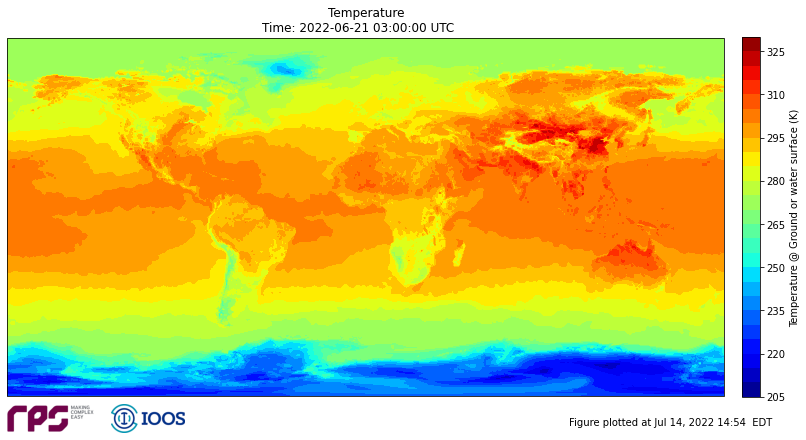

In [121]:
#Store gfs values in class
gfsPlot = plotParams(gfsTemp.lat.values,gfsTemp.lon.values,gfsTemp.values[0],gfsTemp.time1.values,gfsTemp.long_name,gfsTemp.units)
# Plot gfs
plot_figure(gfsPlot,'Temperature',False)

Timeseries for single point

In [122]:
# Download files and create list for a single node
# Set start date/time 
month = 6
year = 2022
hour = 3
gfsTempList = []
# Download and work with multiple files
for day in range(1,31):
    fname = 'gfs_env{}{:02d}{:02d}{:02d}.nc'.format(year, month, day, hour)
    # Download file
    gfsSeriesName = download_file(fname,atmosUrl,savePath)
    # Open file
    with xr.open_dataset(gfsSeriesName) as gfs:
        gfsTempPt = gfs.Temperature_surface.sel(lat=0,lon=0)
    # Store node value in list
    gfsTempList.append(gfsTempPt)

'Temperature Timeseries.png'

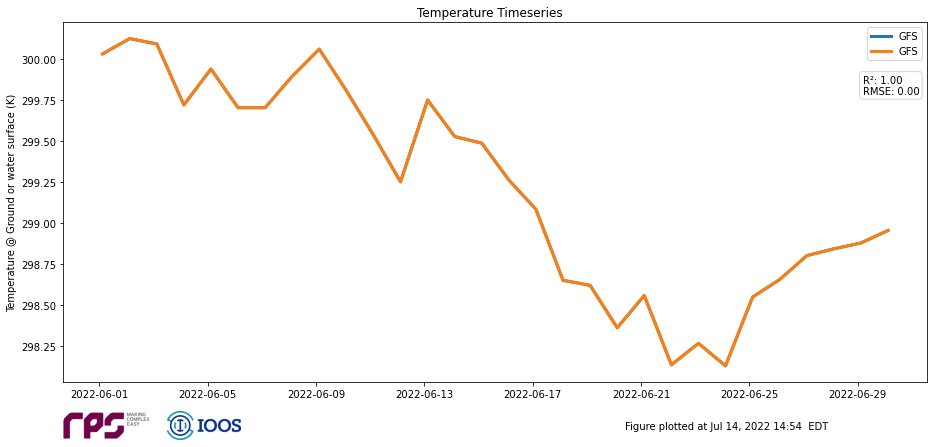

In [123]:
# Compare two data sources in a timeseries plot
gfsTimeseries = []
for num in range(len(gfsTempList)):
    try:
        time = gfsTempList[num].time1.values
    except:           
        time = gfsTempList[num].time.values
    gfsTimeseries.append(plotParams(None,None,gfsTempList[num].values,time,gfsTempList[num].long_name,gfsTempList[num].units))
    
plot_timeseries(gfsTimeseries,gfsTimeseries,'GFS','GFS','Temperature Timeseries',False) 

Monthly Means and Climatology and Statistics

In [124]:
#Calculate monthly mean for GFS
monthNames = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

# Set start date/time 
month = 6
year = 2022
hour = 3
gfsTempList = []

# Download and work with multiple files
dailyArray = np.zeros((gfsTemp.lat.size,gfsTemp.lon.size,len(range(1,31+1)))) #1 month array of data
for day in range(1,31):
    fname = 'gfs_env{}{:02d}{:02d}{:02d}.nc'.format(year, month, day, hour)
    # Download file
    gfsSeriesName = download_file(fname,atmosUrl,savePath)
    # Open file
    with xr.open_dataset(gfsSeriesName) as gfs: 
        gfsTempArray = gfs.Temperature_surface.values
    dailyArray[:,:,day] = gfsTempArray[0]
    
# Calculate monthly mean
gfsMonthMean = np.mean(dailyArray, axis = 2)

'June_June GFS Monthly Mean Temperature.png'

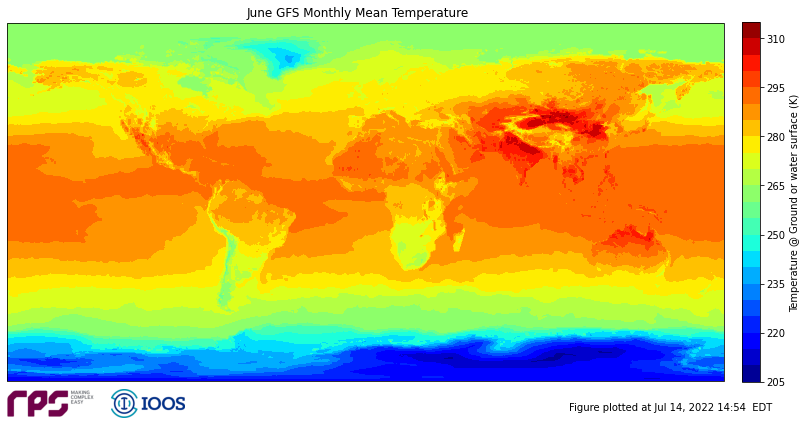

In [125]:
#Plot month mean for GFS
gfsMeanPlot = plotParams(gfsTemp.lat.values,gfsTemp.lon.values,gfsMonthMean,monthNames[month-1],gfsTemp.long_name,gfsTemp.units)
plot_figure(gfsMeanPlot,f'{monthNames[month-1]} GFS Monthly Mean Temperature',False)

In [126]:
# Calculate the difference between dataset and climatology
# Choose which month of climatology to use
climatologyDiff, climatologyInterp = difference_datasets(climatologyTemp.isel(time=5),gfsTemp,gfsMonthMean)

(360, 720)
(720,)
(361,)
(360, 720)
(360, 720)
(360, 720)


In [127]:
#Calculate Percent difference between climatology and GFS
perDiff = (abs((climatologyInterp+273.15)-gfsMonthMean)/gfsMonthMean)*100

'June_June Monthly Mean Temperature Percent Difference\n GFS and UDel Climatology.png'

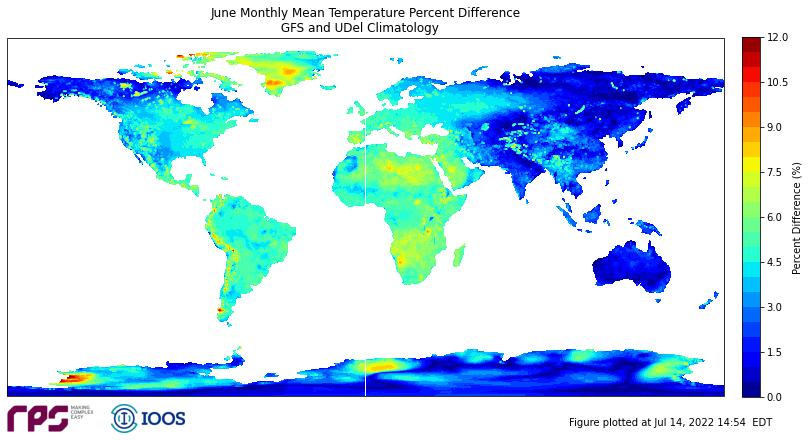

In [128]:
# Plot Percent difference climatology and GFS 
gfsPerDiffPlot = plotParams(gfsTemp.lat.values,gfsTemp.lon.values,perDiff,monthNames[month-1],'Percent Difference', '%')
plot_figure(gfsPerDiffPlot,f'{monthNames[month-1]} Monthly Mean Temperature Percent Difference\n GFS and UDel Climatology',False)

'June_June Monthly Mean Temperature Anomaly\n GFS and UDel Climatology.png'

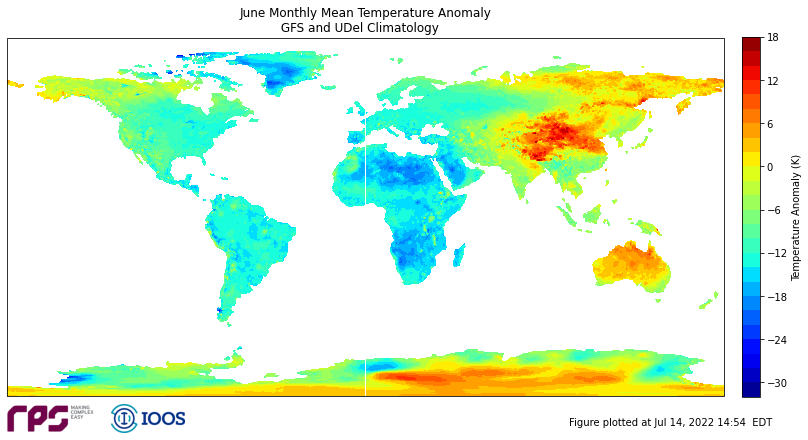

In [129]:
#Plot Anomaly between climatology and gfs
gfsAnomalyPlot = plotParams(gfsTemp.lat.values,gfsTemp.lon.values,climatologyDiff,monthNames[month-1],'Temperature Anomaly','K')
plot_figure(gfsAnomalyPlot,f'{monthNames[month-1]} Monthly Mean Temperature Anomaly\n GFS and UDel Climatology',False)

Other data verifications

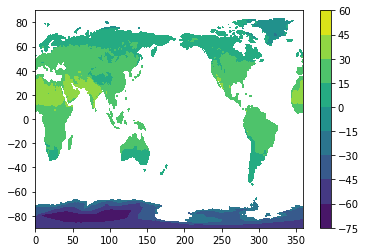

In [130]:
#Climatology plot
plt.figure()
plt.contourf(gfsTemp.lon.values,gfsTemp.lat.values,climatologyInterp,
             levels=[-75, -60,-45,-30,-15,0,15,30,45,60])
plt.colorbar()
plt.show()

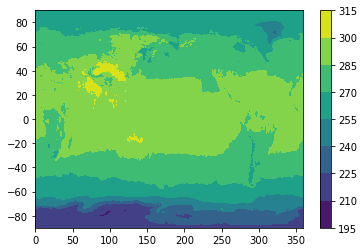

In [131]:
#GFS plot
plt.figure()
plt.contourf(gfsTemp.lon.values,gfsTemp.lat.values,gfsMonthMean)
plt.colorbar()
plt.show()

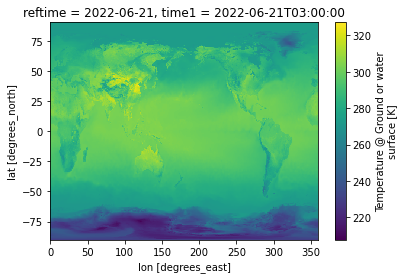

In [132]:
gfsTemp.plot()

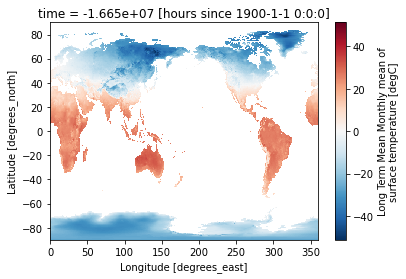

In [133]:
climatologyTemp.isel(time=0).plot()